In [486]:
NAMES = ["Andrew Fidler",
         "Ryan Da Silva",
         "Mike Suderman",
         "Pavel Demin",
         "Saewan Koh",
         ]
GROUP = "4"

In [487]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

In [488]:
# read data
on_df = pd.read_csv('1410037601_databaseLoadingData.csv')

# drop redundant columns
on_df = on_df[[
    'REF_DATE',
    'Class of worker',
    'North American Industry Classification System (NAICS)',
    'VALUE',
    'STATUS'
]]
# convert date column
on_df.REF_DATE = on_df.REF_DATE.astype('datetime64')

print(on_df.head())

    REF_DATE                         Class of worker  \
0 2011-10-01  Total employed, all classes of workers   
1 2011-11-01  Total employed, all classes of workers   
2 2011-12-01  Total employed, all classes of workers   
3 2012-01-01  Total employed, all classes of workers   
4 2012-02-01  Total employed, all classes of workers   

  North American Industry Classification System (NAICS)   VALUE STATUS  
0                     Total employed, all industries     6659.9    NaN  
1                     Total employed, all industries     6678.5    NaN  
2                     Total employed, all industries     6649.4    NaN  
3                     Total employed, all industries     6550.1    NaN  
4                     Total employed, all industries     6545.7    NaN  


In [489]:
# pivot table to show collected values
DF_PIVOT = on_df.pivot(index=["REF_DATE"], 
            columns=["Class of worker", "North American Industry Classification System (NAICS)"],
            values="VALUE")
DF_PIVOT.head()

Class of worker                                       Total employed, all classes of workers  \
North American Industry Classification System (NAICS)         Total employed, all industries   
REF_DATE                                                                                       
2011-10-01                                                                            6659.9   
2011-11-01                                                                            6678.5   
2011-12-01                                                                            6649.4   
2012-01-01                                                                            6550.1   
2012-02-01                                                                            6545.7   

Class of worker                                                               \
North American Industry Classification System (NAICS) Goods-producing sector   
REF_DATE                                                                       
2011-10-01                                                            1428.5   
2011-11-01                                                            1419.4   
2011-12-01                                                            1388.6   
2012-01-01                                                            1364.8   
2012-02-01                                                            1360.8   

Class of worker                                                                               \
North American Industry Classification System (NAICS) Agriculture [111-112, 1100, 1151-1152]   
REF_DATE                                                                                       
2011-10-01                                                                              84.7   
2011-11-01                                                                              84.7   
2011-12-01                                                                              81.5   
2012-01-01                                                                              78.6   
2012-02-01                                                                              77.1   

Class of worker                                                                                                                    \
North American Industry Classification System (NAICS) Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]   
REF_DATE                                                                                                                            
2011-10-01                                                                                          36.4                            
2011-11-01                                                                                          37.3                            
2011-12-01                                                                                          34.9                            
2012-01-01                                                                                          36.3                            
2012-02-01                                                                                          36.8                            

Class of worker                                                       \
North American Industry Classification System (NAICS) Utilities [22]   
REF_DATE                                                               
2011-10-01                                                      51.4   
2011-11-01                                                      51.8   
2011-12-01                                                      50.3   
2012-01-01                                                      47.9   
2012-02-01                                                      49.6   

Class of worker                                                          \
North American Industry Classification System (NAICS) Construction [23]   
REF_DATE                     

In [490]:
# selecting only service industry
services = DF_PIVOT['Total employed, all classes of workers'].iloc[:, 7:]
services.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-10-01,5231.4,1002.1,322.5,490.0,546.0,303.4,464.4,748.6,305.9,402.0,280.1,366.4
2011-11-01,5259.1,1019.7,318.9,491.0,547.7,298.7,482.4,756.7,302.9,389.1,287.2,364.8
2011-12-01,5260.9,1014.5,320.3,485.6,548.4,291.7,485.7,761.5,307.1,399.2,284.8,362.0
2012-01-01,5185.3,986.4,314.4,489.6,550.0,279.3,479.7,756.6,293.3,388.5,290.8,356.8
2012-02-01,5184.9,978.3,304.9,498.5,546.8,285.2,484.9,753.2,299.0,387.4,285.9,360.7


In [491]:
# replacing values with % change from last period and droping 1st row with NA data
services_percentage = services.apply(lambda x: x / (x.shift(1)) * 100 - 100)
services_percentage = services_percentage.tail(-1)
services_percentage.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-11-01,0.529495,1.756312,-1.116279,0.204082,0.311355,-1.549110,3.875969,1.082020,-0.980713,-3.208955,2.534809,-0.436681
2011-12-01,0.034226,-0.509954,0.439009,-1.099796,0.127807,-2.343488,0.684080,0.634333,1.386596,2.595734,-0.835655,-0.767544
2012-01-01,-1.437016,-2.769837,-1.842023,0.823723,0.291758,-4.250943,-1.235330,-0.643467,-4.493650,-2.680361,2.106742,-1.436464
2012-02-01,-0.007714,-0.821168,-3.021628,1.817810,-0.581818,2.112424,1.084011,-0.449379,1.943403,-0.283140,-1.685007,1.093049
2012-03-01,0.472526,1.308392,-1.311906,-0.882648,0.932699,-1.016830,-2.412869,1.168348,3.478261,3.846154,-0.384750,-0.942612


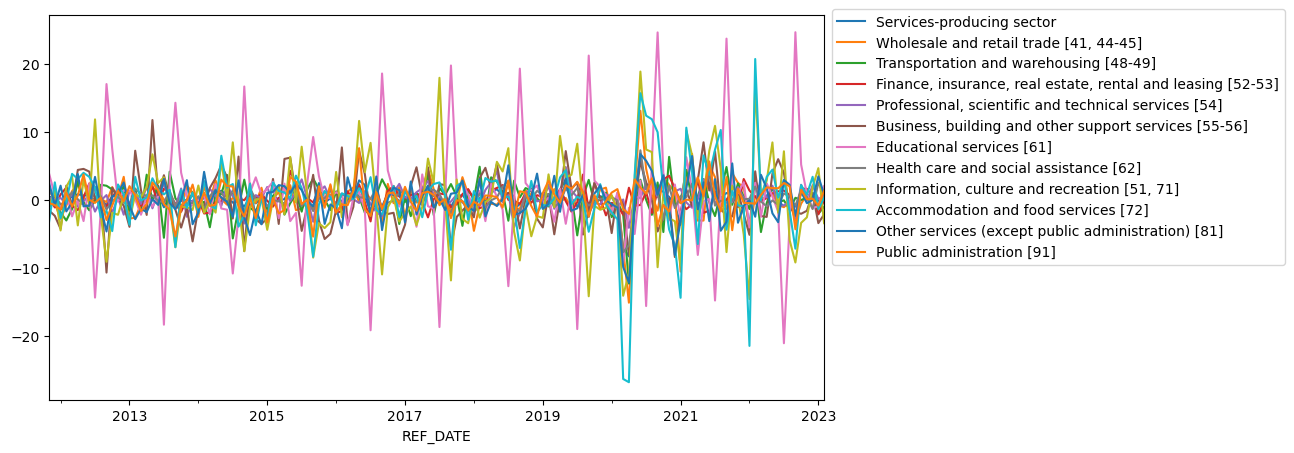

In [492]:
# inspecting change over time, noticing significant flactuation in certain sub-industries
services_percentage.plot(kind='line',figsize=(10,5))
plt.legend(loc=(1.01,.35))

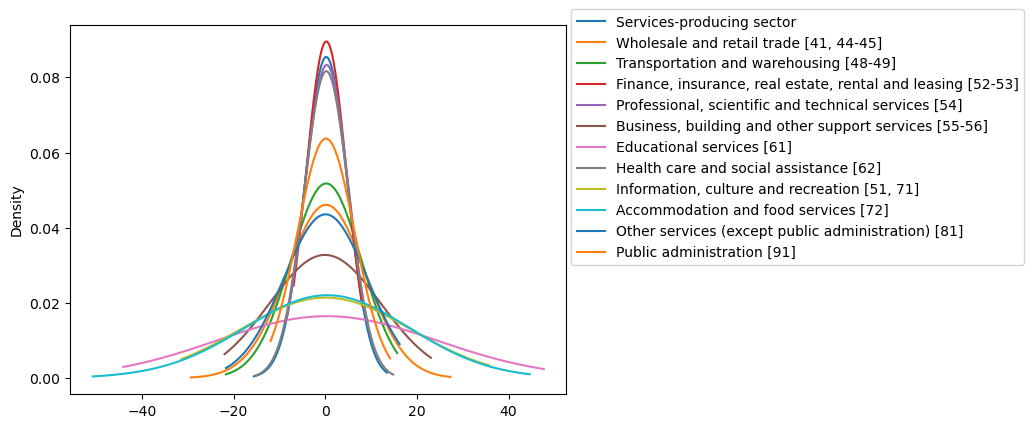

In [493]:
# inspecting the curve, observing no noticable skewness, but kurtosis definately varies significantly 
services_percentage.plot.kde(bw_method=3)
plt.legend(loc=(1.01,.35))

In [494]:
# just confirming that skewness of data is insignificant
services_percentage.skew()

North American Industry Classification System (NAICS)
Services-producing sector                                     -1.743910
Wholesale and retail trade [41, 44-45]                        -0.893186
Transportation and warehousing [48-49]                        -1.027568
Finance, insurance, real estate, rental and leasing [52-53]    0.211148
Professional, scientific and technical services [54]          -0.120729
Business, building and other support services [55-56]          0.188928
Educational services [61]                                      0.419785
Health care and social assistance [62]                        -0.801756
Information, culture and recreation [51, 71]                   0.303481
Accommodation and food services [72]                          -1.365528
Other services (except public administration) [81]            -0.701002
Public administration [91]                                     0.086574
dtype: float64

In [495]:
# kurtosis, as expected is out of bound, data is too peaky
services_percentage.kurtosis()

North American Industry Classification System (NAICS)
Services-producing sector                                      12.151854
Wholesale and retail trade [41, 44-45]                         10.903770
Transportation and warehousing [48-49]                          4.333882
Finance, insurance, real estate, rental and leasing [52-53]    -0.044406
Professional, scientific and technical services [54]            0.905831
Business, building and other support services [55-56]           0.152008
Educational services [61]                                       3.158553
Health care and social assistance [62]                          9.198651
Information, culture and recreation [51, 71]                    1.192269
Accommodation and food services [72]                            8.480484
Other services (except public administration) [81]              2.340166
Public administration [91]                                      1.430982
dtype: float64

In [496]:
# making columns for month and year for further inspection
services_percentage["Month"] = services_percentage.index.month
services_percentage["Year"] = services_percentage.index.year

In [497]:
# inspecting data by year, 2020 already stands out
services_percentage.groupby(['Year'])["Services-producing sector"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,2.0,0.281861,0.350208,0.034226,0.158044,0.281861,0.405678,0.529495
2012,12.0,0.174192,0.694815,-1.437016,-0.133411,0.503775,0.651760,0.852305
2013,12.0,0.045222,0.884780,-1.106042,-0.611499,-0.084004,0.567680,1.885344
2014,12.0,0.099294,0.745427,-1.002237,-0.472211,0.087368,0.543683,1.356890
2015,12.0,0.032109,0.869299,-1.341055,-0.529826,0.138502,0.633381,1.656322
2016,12.0,0.125278,1.014236,-1.829431,-0.320882,0.120519,0.674790,2.059898
2017,12.0,0.235626,0.787952,-1.011477,-0.282369,0.223204,0.553977,2.133611
2018,12.0,0.193052,0.906404,-1.389010,-0.225071,0.417869,0.725259,1.583104
2019,12.0,0.269970,0.793218,-0.968925,-0.434186,0.309640,0.640313,1.855303


In [498]:
# inspecting data by month, some variationn, but no strong leads
services_percentage.groupby(['Month'])["Services-producing sector"].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,12.0,-1.307776,1.162121,-3.664595,-1.401012,-1.011540,-0.643038,-0.201771
2,12.0,0.748372,1.022730,-0.175621,0.236234,0.433330,0.685173,3.140678
3,11.0,-0.559049,2.275331,-6.981888,-0.436685,-0.223757,0.031269,2.326111
4,11.0,-0.292190,2.761643,-8.316521,0.323692,0.622400,0.929302,1.106860
5,11.0,1.435472,0.643767,0.080552,1.123794,1.648928,1.870324,2.133611
6,11.0,1.239005,1.771377,-0.235145,0.615223,0.708522,0.782143,6.197487
7,11.0,-0.346035,0.976987,-1.829431,-1.018934,-0.403313,0.227137,1.597131
8,11.0,0.201397,0.904476,-1.293419,-0.158762,0.172226,0.437836,2.399884
9,11.0,-0.484270,0.947189,-1.341055,-0.995560,-0.800176,-0.605919,1.689765


In [499]:
# inspecting just 2020 sorted by month, some months already stand out
services_percentage[services_percentage['Year'] == 2020].groupby(['Month']).head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91],Month,Year
REF_DATE,,,,,,,,,,,,,,
2020-01-01,-0.975537,-1.929794,-2.531328,-0.427843,0.435540,-4.877271,-2.022352,0.432229,0.722146,-1.837672,-0.614754,1.088977,1,2020
2020-02-01,-0.175621,0.792449,-0.231422,-0.760205,-1.185314,1.005362,1.122578,-0.066211,-1.536361,-2.852686,-1.134021,1.602733,2,2020
2020-03-01,-6.981888,-7.279152,-2.113402,-2.181515,0.073142,-0.763106,-9.364369,-7.696555,-14.112344,-26.382198,-9.871394,-1.344712,3,2020
2020-04-01,-8.316521,-15.139101,-12.322275,1.804562,-4.107587,-8.124373,-1.165547,-6.675440,-10.779168,-26.861951,-12.186656,-2.044561,4,2020
2020-05-01,0.080552,1.616706,-1.621622,-0.836120,0.533537,-0.873362,-5.016990,-0.153826,2.805430,3.706860,-0.439174,3.023816,5,2020
2020-06-01,6.197487,13.147718,2.991453,-0.741990,0.288097,5.653451,2.840909,7.318013,18.926056,15.735415,6.749007,1.844156,6,2020
2020-07-01,1.597131,4.599160,0.029638,1.172273,2.343514,2.640723,-15.633313,1.507357,7.438934,12.424565,5.785124,0.918133,7,2020
2020-08-01,2.399884,0.700149,-2.192593,-1.897565,2.097799,-0.067705,5.675479,2.840306,7.061660,11.904010,4.296875,3.184230,8,2020
2020-09-01,1.689765,-1.575971,2.574977,1.300924,0.434091,-4.640921,24.695892,0.928260,-9.909910,9.988713,0.786517,-3.845212,9,2020


<AxesSubplot:xlabel='Month', ylabel='Services-producing sector'>

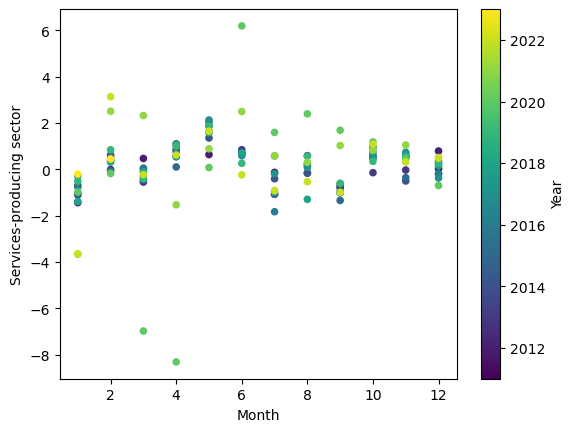

In [500]:
# inspecting scatterplot, noticing 3 visible outliers 
services_percentage.plot.scatter("Month", "Services-producing sector", c="Year", colormap='viridis')

In [501]:
# droping 4 months (march to june) as significant outliers 
services_percentage_exl_2020 = services_percentage.drop(['2020-03-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-04-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-05-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-06-01'])

In [502]:
# recalculating kurtosis, significant improvement
services_percentage_exl_2020.kurtosis()

North American Industry Classification System (NAICS)
Services-producing sector                                      2.193996
Wholesale and retail trade [41, 44-45]                         5.130718
Transportation and warehousing [48-49]                         0.392545
Finance, insurance, real estate, rental and leasing [52-53]    0.009210
Professional, scientific and technical services [54]           0.712202
Business, building and other support services [55-56]          0.182701
Educational services [61]                                      3.145699
Health care and social assistance [62]                         0.276796
Information, culture and recreation [51, 71]                   1.057110
Accommodation and food services [72]                           6.736540
Other services (except public administration) [81]             0.001212
Public administration [91]                                     1.563300
Month                                                         -1.266881
Year      